# EDA of IPL dataset
---------------------

# Importing libraries and reading CSV

In [118]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
%matplotlib inline

In [119]:
matches = pd.read_csv("matches.csv")

# Checking size of data and basic info

In [120]:
matches.shape

(756, 18)

In [121]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
print(matches.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [122]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Statistical info of data

In [123]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


We can see from statistical info that average number of win by wickets and runs is 3 and 13 respectively.

# Checking null values

In [124]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

We can see that 637 values of third umpire are missing, let's drop them from data

In [125]:
matches.drop(columns=['umpire3'], axis=1,inplace=True)

Filling missing City value with most frequent city 

In [126]:
matches['city'].fillna(matches["city"].mode().iloc[0], inplace=True)

In [127]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [129]:
matches.shape

(756, 17)

# Checking duplicates

In [130]:
matches.duplicated().sum()

0

There are no duplicate values in our data

# Seasons

In [131]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [132]:
len(matches['season'].unique())

12

Checking which season had maximum number of matches

<AxesSubplot:xlabel='season', ylabel='count'>

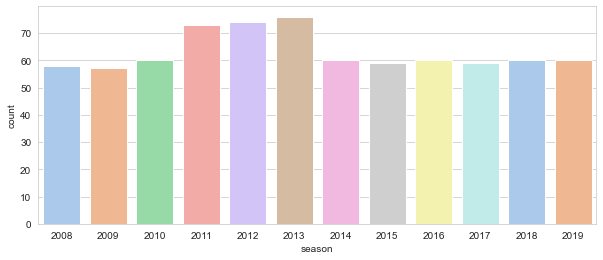

In [235]:
plt.figure(figsize=(10,4))
sns.countplot(x='season', data=matches , palette="pastel")

<AxesSubplot:xlabel='season', ylabel='count'>

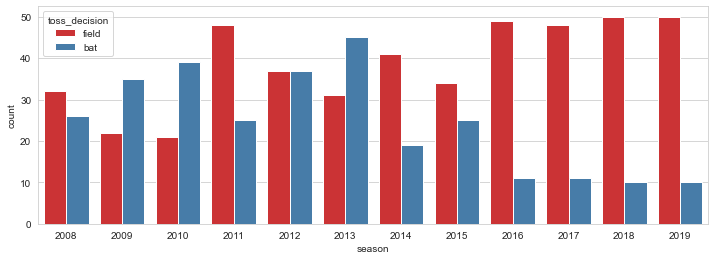

In [238]:
plt.figure(figsize=(12,4))
sns.countplot(x='season', data=matches, hue=matches["toss_decision"] , palette="Set1")

From graph it's evident that season "2013" had maximum number of matches while season "2009" had minimum

# Number of matchevalue_counts

In [133]:
matches.groupby(matches["season"])['id'].unique()

season
2008    [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...
2009    [118, 119, 120, 121, 122, 123, 124, 125, 126, ...
2010    [175, 176, 177, 178, 179, 180, 181, 182, 183, ...
2011    [235, 236, 237, 238, 239, 240, 241, 242, 243, ...
2012    [308, 309, 310, 311, 312, 313, 314, 315, 316, ...
2013    [382, 383, 384, 385, 386, 387, 388, 389, 390, ...
2014    [458, 459, 460, 461, 462, 463, 464, 465, 466, ...
2015    [518, 519, 520, 521, 522, 523, 524, 525, 526, ...
2016    [577, 578, 579, 580, 581, 582, 583, 584, 585, ...
2017    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2018    [7894, 7895, 7896, 7897, 7898, 7899, 7900, 790...
2019    [11137, 11138, 11139, 11140, 11141, 11142, 111...
Name: id, dtype: object

In [134]:
len(matches['id'].unique())

756

756 is the total number of matches in our dataset

# Visulazing matches played in city

<AxesSubplot:>

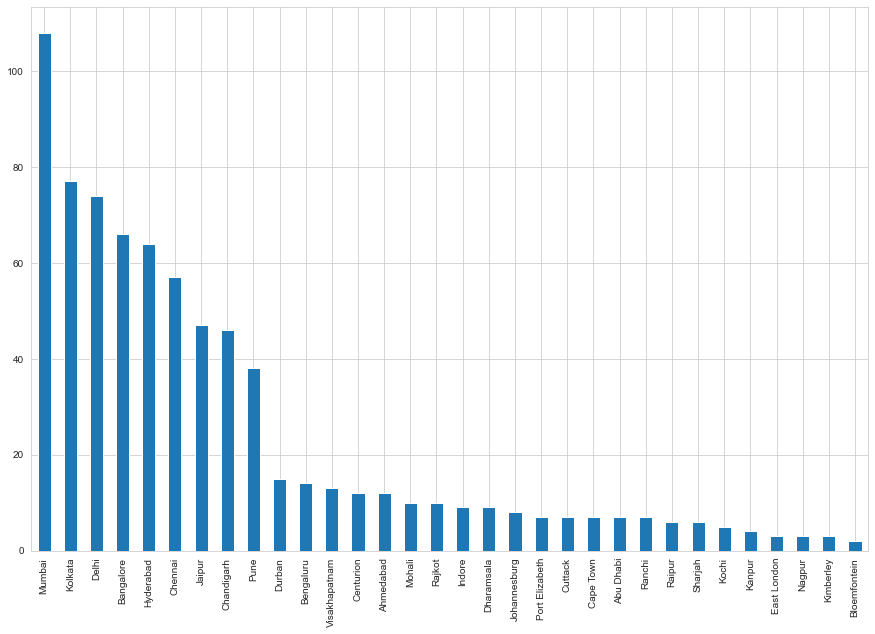

In [137]:
plt.figure(figsize=(15,10))
matches["city"].value_counts().plot(kind="bar")

We can see that Mumbai and Kolkata were popular

# Checking which team has won by maximum run and wickets

In [146]:
# Checking winner by max runs
matches.iloc[matches["win_by_runs"].idxmax()]['winner']

'Mumbai Indians'

In [147]:
# Checking winner by max wickets
matches.iloc[matches["win_by_wickets"].idxmax()]['winner']

'Kolkata Knight Riders'

# Checking which team won maximum number of matches

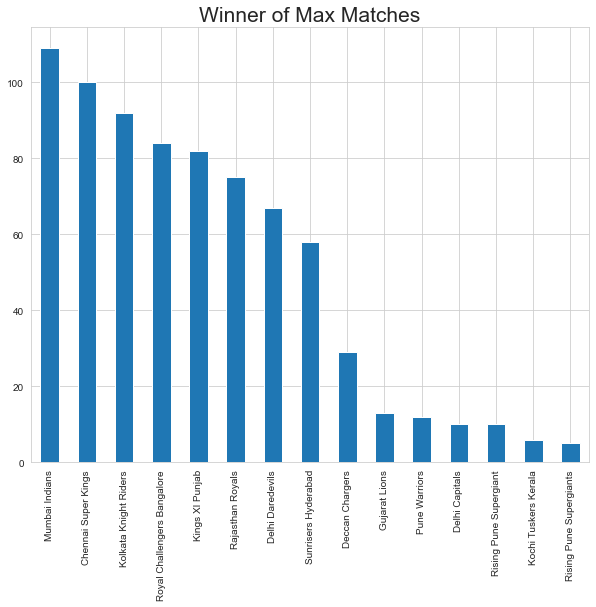

In [233]:
plt.figure(figsize=(10,8))
matches['winner'].value_counts().plot(kind="bar")
plt.title("Winner of Max Matches", fontsize="21")
plt.show()

# Let's see which player has won "Player of the match" title maximum times

<function matplotlib.pyplot.show(close=None, block=None)>

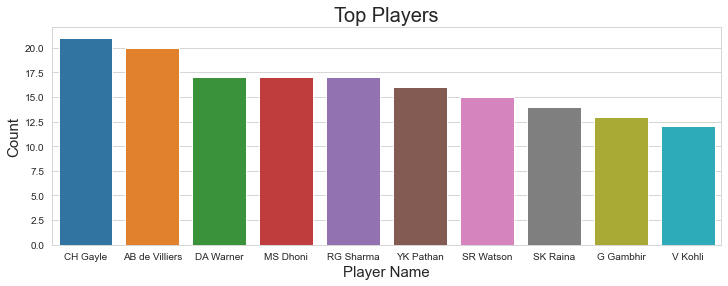

In [193]:
# Checking only Top 10 players
plt.figure(figsize=(12,4))
sns.barplot(x = matches['player_of_match'].value_counts()[:10].index , y=matches['player_of_match'].value_counts()[:10])
plt.title("Top Players" , fontsize="20")
plt.xlabel("Player Name",fontsize="15")
plt.ylabel("Count",fontsize="15")
plt.show

In [192]:
len(matches['player_of_match'].value_counts())

226

# Exploring the toss data

<function matplotlib.pyplot.show(close=None, block=None)>

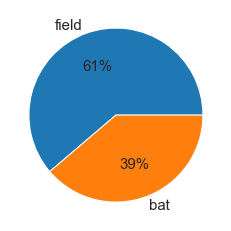

In [267]:
# matches['toss_decision'].value_counts()
label1 =matches['toss_decision'].value_counts().index
textprops = {"fontsize":15}
plt.pie(matches['toss_decision'].value_counts(), labels= label1,textprops =textprops,autopct = "%0.0f%%")
plt.show

From pie chart we can see that to field first is maximum team's first choice

# Toss decision as per Venue

<function matplotlib.pyplot.show(close=None, block=None)>

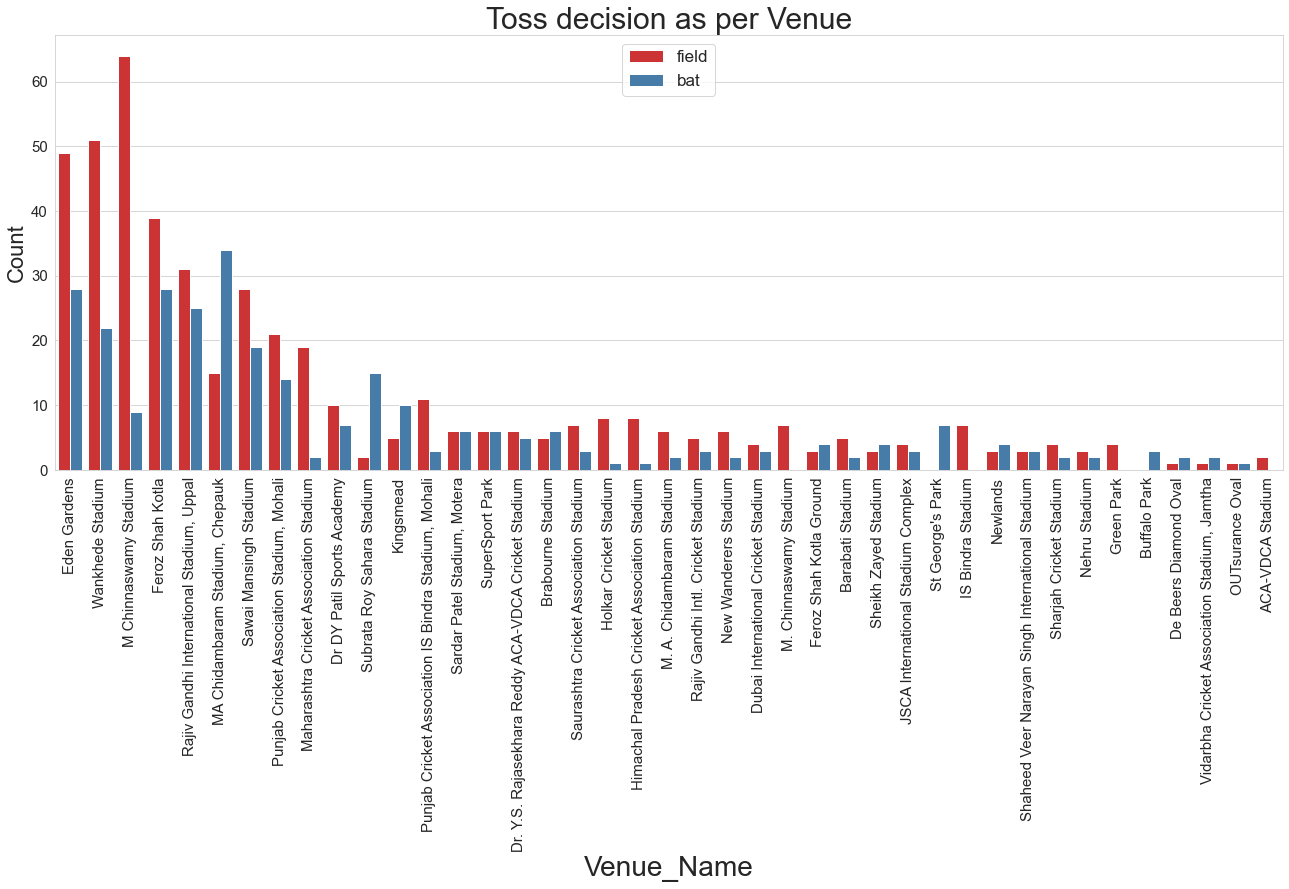

In [264]:
plt.figure(figsize=(22,8))
sns.countplot(x=matches['venue'], data=matches, hue=matches["toss_decision"] , palette="Set1",order=pd.value_counts(matches['venue']).index)
plt.xticks(rotation='vertical' , fontsize="15")
plt.yticks(fontsize="15")
plt.xlabel("Venue_Name", fontsize="28")
plt.title("Toss decision as per Venue" , fontsize="30")
plt.ylabel("Count" , fontsize="22")
plt.legend(fontsize="17")
plt.show

# Does Toss_decision make any impact on result of match?

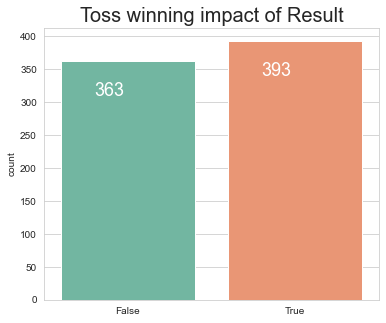

In [231]:
plt.figure(figsize=(6,5))
ax =sns.countplot(x =(matches['toss_winner'] == matches['winner']) , palette="Set2")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=18)
plt.title("Toss winning impact of Result", fontsize="20")
plt.show()